In [1]:
import pandas as pd
import spacy

In [2]:
df = pd.read_json("C:/Users/soumy/news_dataset.json")

In [3]:
df.head()

,text,category
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS
3,This Richard Sherman Interception Literally Sh...,SPORTS
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS


In [6]:
df.category.value_counts()

category
CRIME       2500
SPORTS      2500
BUSINESS    2500
Name: count, dtype: int64

In [7]:
df.shape

(7500, 2)

In [8]:
df['label_num'] = df['category'].map({'CRIME' : 0, 'SPORTS': 1, 'BUSINESS': 2})

In [9]:
df.head()

,text,category,label_num
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1
3,This Richard Sherman Interception Literally Sh...,SPORTS,1
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2


In [10]:
nlp = spacy.load("en_core_web_sm")

In [11]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [12]:
df['preprocessed_text'] =df['text'].apply(lambda x: preprocess(x))

In [13]:
df.head()

,text,category,label_num,preprocessed_text
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame victim say victimize newly ...
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer die fall Horse
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,Vegas Taxpayers spend Record $ 750 million New...
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill Weed Legalization Buzz


In [14]:
nlp = spacy.load("en_core_web_lg")

In [15]:
df['vector'] =df['preprocessed_text'].apply(lambda x: nlp(x).vector)

In [16]:
df.head()

,text,category,label_num,preprocessed_text,vector
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame victim say victimize newly ...,"[-0.5585511, -0.29323253, -0.9253956, 0.189389..."
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer die fall Horse,"[-0.9579799, -0.6604367, -0.9265466, -0.851133..."
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,Vegas Taxpayers spend Record $ 750 million New...,"[-1.9236181, 0.31445053, -3.5021205, 1.6335825..."
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...,"[-1.4702771, -0.685319, 0.57398, -0.31135806, ..."
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill Weed Legalization Buzz,"[-1.037173, -1.9495698, -1.7179357, 1.2975286,..."


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size = 0.2,
    random_state = 2002,
    stratify = df.label_num
)

In [18]:
import numpy as np


print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train before reshaping:  (6000,)
Shape of X_test before reshaping:  (1500,)
Shape of X_train after reshaping:  (6000, 300)
Shape of X_test after reshaping:  (1500, 300)


In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(X_train_2d,y_train)

DecisionTreeClassifier()

In [20]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test_2d)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.74       500
           1       0.73      0.69      0.71       500
           2       0.74      0.72      0.73       500

    accuracy                           0.73      1500
   macro avg       0.73      0.73      0.73      1500
weighted avg       0.73      0.73      0.73      1500



In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.fit_transform(X_test_2d)


clf = MultinomialNB()

clf.fit(scaled_train_embed,y_train)


MultinomialNB()

In [22]:
y_pred = clf.predict(scaled_test_embed)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       500
           1       0.86      0.74      0.80       500
           2       0.76      0.81      0.78       500

    accuracy                           0.81      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.81      0.81      0.81      1500



In [23]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train_2d,y_train)


KNeighborsClassifier()

In [24]:
y_pred = clf.predict(X_test_2d)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       500
           1       0.90      0.81      0.85       500
           2       0.89      0.84      0.86       500

    accuracy                           0.86      1500
   macro avg       0.86      0.86      0.86      1500
weighted avg       0.86      0.86      0.86      1500



In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(scaled_train_embed,y_train)

RandomForestClassifier()

In [26]:
y_pred = clf.predict(scaled_test_embed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       500
           1       0.87      0.79      0.83       500
           2       0.81      0.88      0.84       500

    accuracy                           0.84      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.84      0.84      0.84      1500



In [27]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

clf.fit(X_train_2d,y_train)

GradientBoostingClassifier()

In [29]:
y_pred = clf.predict(X_test_2d)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       500
           1       0.90      0.84      0.87       500
           2       0.87      0.88      0.88       500

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500



In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[458,  17,  25],
       [ 40, 419,  41],
       [ 26,  32, 442]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

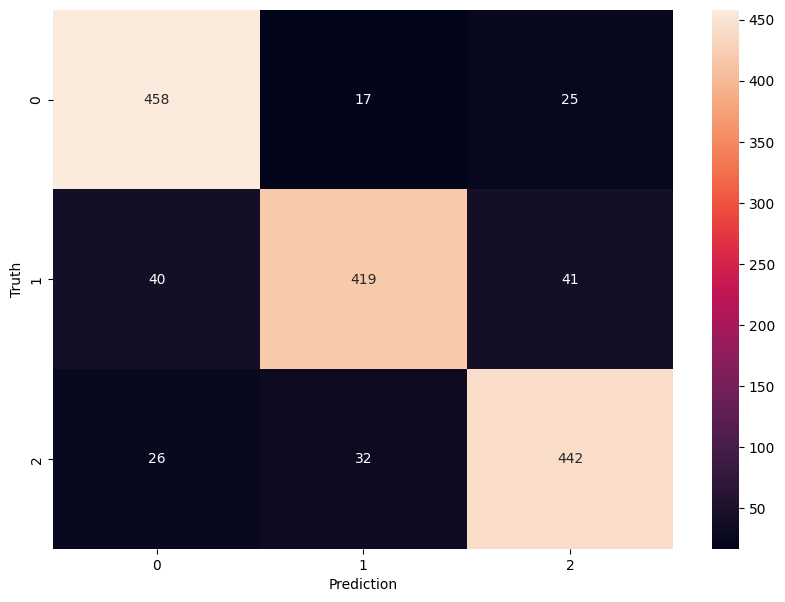

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')